In [1]:
import sys
print(sys.version)

3.10.9 (tags/v3.10.9:1dd9be6, Dec  6 2022, 20:01:21) [MSC v.1934 64 bit (AMD64)]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

#import cv2
#import imutils

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [6]:
folder = '../../mag/project/Baza_zdjec_konwersja_64x64/s'
slesh = '/'
png = '.png'

In [7]:
#Tablica przechowująca zdjęcia osób
train_ppl = []
for i in range(1,11):
    images = []
    for j in range(1,141):
        im = Image.open(folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images.append(arr_im) 
    train_ppl.append(images)

for i in range(27,41):
    images = []
    for j in range(1,141):
        im = Image.open(folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images.append(arr_im) 
    train_ppl.append(images)

valid_ppl = []    
for i in range(11,15):
    images_4 = []
    for j in range(1,141):
        im = Image.open('../Zdjecia/'+folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images_4.append(arr_im) 
    valid_ppl.append(images_4) 
    
    
test_ppl = []    
for i in range(15,19):
    images_2 = []
    for j in range(1,141):
        im = Image.open('../Zdjecia/'+folder+str(i)+slesh+str(j)+png)
        arr_im = np.array(im) 
        images_2.append(arr_im) 
    test_ppl.append(images_2) 

In [8]:
w, h = 64, 128
data = np.zeros((h, w), dtype=np.uint8)

In [9]:
#############################################
#       Tworzenie próbek treningowych       #
#                  Pozytywne                #
#############################################


#Laczna ilosc zdjec
train_len = 15120

rozmiar = 10
train = []
n = 0

# Inicjalizacja tablicy zerami 
train_labels = np.zeros(train_len, dtype=np.uint8)

#Stworzenie nowego katalogu
train_path = '../../mag/Dataset_both/Real/Train/'
if not os.path.exists(train_path):
    os.makedirs(train_path)

#Petla przechodzi po ludziach
for i in range(0,24):
    #Petla przechodzi po zdjeciach
    
    for l in range(0,70,10):
    
        m = 10
    
        for j in range(rozmiar):       
            m = m - 1
        
            for k in range(m):
                
                a = 0
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(len(train_ppl[i][j+l])):
                    p = 2*p
                    data[p] = train_ppl[i][j+l][a]
                    data[p+1] = train_ppl[i][9-k+l][a]
                    a = a + 1
    
                #Zapisanie zmienionego zdjecia
                con = Image.fromarray(data)
                con.save(train_path+str(n)+png) 
      
                train.append(con)
                train_labels[n] = 1
                n = n + 1   
print(n)

7560


In [10]:
#############################################
#       Tworzenie próbek treningowych       #
#                  Neagtywne                #
#############################################
w, h = 64, 128

x = 0 #Licznik 

m = 25
rozne = []


for i in range(24):

    rand_1 = random.randint(0,8)
    rand_2 = random.randint(0,8)
   
    
    m = m - 1
    
    for k in range(1,m):
    
        for j in range(10):
       
            for l in range(10):
            
                a = 0
                data = np.zeros((h, w), dtype=np.uint8)
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(w):
                    p = 2*p
                    data[p] = train_ppl[i][10*rand_1+j][a]
                    data[p+1] = train_ppl[i+k][10*rand_2+l][a]
                    a = a + 1
            
                con = Image.fromarray(data)
                            
                x = x + 1
                rozne.append(con)
print(x)

27600


In [11]:
train_path = '../../mag/Dataset_both/Real/Train/'

# WYbranie odpowiedniej ilośći próbke
for i in range(train_len - n):
    
    rand_1 = random.randint(0,x-1)
    
    con = rozne[rand_1]
    
    con.save(train_path+str(n)+png) 
    
    train.append(con)
    
    train_labels[n] = 0
    n = n + 1
    
print(n)

15120


In [14]:
print(n)
print(len(train))

print(train_labels[7000])

15120
15120
1


In [16]:
#Zapis tablicy do pliku CSV
train_labels.tofile(train_path+'train.csv', sep = ' ')  

In [35]:
######################################
#       Tworzenie próbek Valid       #
#             Pozytywne              #
######################################

valid_len = 2520

#Tablica przechowuje gotowe próbki validacyjne
valid = []

n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'rozmiar'
valid_labels= np.zeros(valid_len, dtype=np.uint8)

#Stworzenie nowego katalogu
valid_path = '../../mag/Dataset_both/Real/Valid/'
if not os.path.exists(valid_path):
    os.makedirs(valid_path)

#Petla przechodzi po ludziach
for i in range(0,4):
    #Petla przechodzi po zdjeciach
    
    for l in range(0,70,10):
    
        m = 10
    
        for j in range(rozmiar):       
            m = m - 1
        
            for k in range(m):
                
                a = 0
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(len(valid_ppl[i][j+l])):
                    p = 2*p
                    data[p] = valid_ppl[i][j+l][a]
                    data[p+1] = valid_ppl[i][9-k+l][a]
                    a = a + 1
    
    
    
                #Zapisanie zmienionego zdjecia
                con = Image.fromarray(data)
                con.save(valid_path+str(n)+png) 
      
                valid.append(con)
                valid_labels[n] = 1
                n = n + 1
                
print(n)

1260


In [36]:
######################################
#       Tworzenie próbek Valid       #
#             Negatywne              #
######################################

x = 0 #Zamiast n 

polaczone = n
m = 5
rozne_valid = []


for i in range(4):

    rand_1 = random.randint(2,5)
    rand_2 = random.randint(2,5)
   
    m = m - 1
    
    for k in range(1,m):
    
        for j in range(10):
       
            for l in range(10):
            
                a = 0
                
                data = np.zeros((h, w), dtype=np.uint8)
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(w):
                    p = 2*p
                    data[p] = valid_ppl[i][10*rand_1+j][a]
                    data[p+1] = valid_ppl[i+k][10*rand_2+l][a]
                    a = a + 1
            
                con = Image.fromarray(data)
                x = x + 1
                rozne_valid.append(con)
            
                a = 0
                
                data = np.zeros((h, w), dtype=np.uint8)
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(w):
                    p = 2*p
                    data[p] = valid_ppl[i][10*(rand_1+2)+j][a]
                    data[p+1] = valid_ppl[i+k][10*(rand_2+2)+l][a]
                    a = a + 1
            
                con = Image.fromarray(data)
                x = x + 1
                rozne_valid.append(con)
            
            
                a = 0
                
                data = np.zeros((h, w), dtype=np.uint8)
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(w):
                    p = 2*p
                    data[p] = valid_ppl[i][10*(rand_1-2)+j][a]
                    data[p+1] = valid_ppl[i+k][10*(rand_2-2)+l][a]
                    a = a + 1
            
                con = Image.fromarray(data)
                x = x + 1
                rozne_valid.append(con)
                
print(x)

1800


In [37]:
for i in range(valid_len - n):
    
    rand_1 = random.randint(0,x-1)
    
    con = rozne_valid[rand_1]
    
    con.save(valid_path+str(n)+png) 
    
    valid.append(con)
    
    valid_labels[n] = 0
    n = n + 1
    
print(n)
print(len(valid_labels))

2520
2520


In [38]:
#Zapis tablicy do pliku CSV
valid_labels.tofile(valid_path+'valid.csv', sep = ' ')  

In [39]:
#####################################
#       Tworzenie próbek Test       #
#             Pozytywne             #
#####################################

test_len = 2520

#Tablica przechowuje gotowe próbki testowe
test = []

n = 0

# Inicjalizacja tablicy zerami o rozmiarze 'rozmiar'
test_labels = np.zeros(test_len, dtype=np.uint8)


#Stworzenie nowego katalogu
test_path = '../../mag/Dataset_both/Real/Test/'
if not os.path.exists(test_path):
    os.makedirs(test_path)

#Petla przechodzi po ludziach
for i in range(4):
    #Petla przechodzi po zdjeciach
    
    for l in range(0,70,10):
    
        m = 10
    
        for j in range(rozmiar):       
            m = m - 1
        
            for k in range(m):
                
                a = 0
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(len(test_ppl[i][j+l])):
                    p = 2*p
                    data[p] = test_ppl[i][j+l][a]
                    data[p+1] = test_ppl[i][9-k+l][a]
                    a = a + 1
    
                #Zapisanie zmienionego zdjecia
                con = Image.fromarray(data)
                con.save(test_path+str(n)+png) 
      
                test.append(con)
                test_labels[n] = 1
                n = n + 1
                
print(n)

1260


In [40]:
#####################################
#       Tworzenie próbek Test       #
#             Negatywne             #
#####################################

x = 0 #Zamiast n 

polaczone = n
m = 5
rozne_test = []


for i in range(4):

    rand_1 = random.randint(2,5)
    rand_2 = random.randint(2,5)
   
    
    m = m - 1
    
    for k in range(1,m):
    
        for j in range(10):
       
            for l in range(10):
            
                a = 0
                
                data = np.zeros((h, w), dtype=np.uint8)
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(w):
                    p = 2*p
                    data[p] = test_ppl[i][10*rand_1+j][a]
                    data[p+1] = test_ppl[i+k][10*rand_2+l][a]
                    a = a + 1
            
                con = Image.fromarray(data)
                x = x + 1
                rozne_test.append(con)
            
                a = 0
            
                data = np.zeros((h, w), dtype=np.uint8)
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(w):
                    p = 2*p
                    data[p] = test_ppl[i][10*(rand_1+2)+j][a]
                    data[p+1] = test_ppl[i+k][10*(rand_2+2)+l][a]
                    a = a + 1
            
                con = Image.fromarray(data)
                x = x + 1
                rozne_test.append(con)
                a = 0
                
                data = np.zeros((h, w), dtype=np.uint8)
                
                #Pętla służy do przeplatania wierszy zdjęć
                for p in range(w):
                    p = 2*p
                    data[p] = test_ppl[i][10*(rand_1-2)+j][a]
                    data[p+1] = test_ppl[i+k][10*(rand_2-2)+l][a]
                    a = a + 1
            
                con = Image.fromarray(data)
                x = x + 1
                rozne_test.append(con)  
                
print(x)




1800


In [41]:
for i in range(test_len - n):
    
    rand_1 = random.randint(0,x-1)
    
    con = rozne_test[rand_1]
    
    con.save(test_path+str(n)+png) 
    
    test.append(con)
    
    test_labels[n] = 0
    n = n + 1
    
print(n)
print(len(test_labels))

2520
2520


In [42]:
#Zapis tablicy do pliku CSV
test_labels.tofile(test_path+'test.csv', sep = ' ')

1


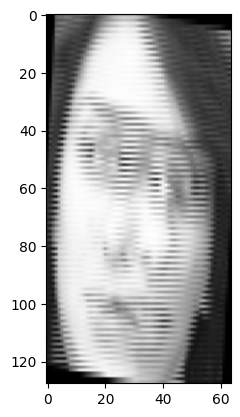

In [43]:
a = 2500
plt.imshow(train[a], cmap = 'gray')
print(train_labels[a])